In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sys                                               ## 파이썬 엔진에 대한 정보를 관리하는 모듈을 사용한다. 
from matplotlib import font_manager, rc                  ## 폰트를 관리하는 함수와 설정 함수를 사용한다. 

if sys.platform  == 'darwin':                             ## MAC OS의 이름을 확인한다.
    path = '.....'  
elif sys.platform == 'win32':                             ## Windows 이름을 확인한다.
    path = "font/malgun.ttf"
else:
    print('Unknown system... sorry~~~~') 
    
font_name = font_manager.FontProperties(fname=path).get_name()        ##  폰트가 있는지를 확인한다. 
rc('font', family=font_name)                                          ## 한글 폰트를 시각화 환경에 세팅한다. 
plt.rcParams['axes.unicode_minus'] = False 

In [129]:
# 데이터 불러오고 전처리
# 오피스텔
data1 = pd.read_excel('./data/price/오피스텔_전세가격1.xlsx')
data1 = data1[['2019.01', '2019.07', '2020.01']]
data1.rename(columns={'2019.01':'2019년 01월',
                     '2019.07':'2019년 07월',
                     '2020.01':'2020년 01월'}, inplace=True)
data1 = data1.drop(0)
data1 = data1.iloc[0]

data2 = pd.read_excel('./data/price/오피스텔_전세가격2.xlsx', header=10)
data2 = data2[['2020년 07월', '2021년 01월', '2021년 07월', '2022년 01월']]
data2 = data2.drop(0)
data2 = data2.iloc[0]

# 오피스텔 concat
data = pd.concat((data1, data2))

# 단독
data3 = pd.read_excel('./data/price/평균전세가격_단독.xlsx', header=10)
data3 = data3.drop(['Unnamed: 1', 'Unnamed: 2'], axis=1)
data3 = data3[['2019년 01월', '2019년 07월', '2020년 01월', '2020년 07월', '2021년 01월', '2021년 07월', '2022년 01월']]
data3 = data3.iloc[0]

# 아파트
data4 = pd.read_excel('./data/price/평균전세가격_아파트.xlsx', header=10)
data4 = data4.drop(['Unnamed: 1', 'Unnamed: 2'], axis=1)
data4 = data4[['2019년 01월', '2019년 07월', '2020년 01월', '2020년 07월', '2021년 01월', '2021년 07월', '2022년 01월']]
data4 = data4.iloc[0]

# 연립다세대
data5 = pd.read_excel('./data/price/평균전세가격_연립다세대.xlsx', header=10)
data5 = data5.drop(['Unnamed: 1', 'Unnamed: 2'], axis=1)
data5 = data5[['2019년 01월', '2019년 07월', '2020년 01월', '2020년 07월', '2021년 01월', '2021년 07월', '2022년 01월']]
data5 = data5.iloc[0]

C:\Users\Seungjun\anaconda3\envs\pydatavenv\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [130]:
# 데이터 합치기
df = pd.concat([data, data3, data4, data5], axis=1)
df = df.T
df.index = ['오피스텔', '단독', '아파트', '연립다세대']
df

,2019년 01월,2019년 07월,2020년 01월,2020년 07월,2021년 01월,2021년 07월,2022년 01월
오피스텔,141630.0,141059.0,141638.0,163525.0,165916.0,168168.0,172122.0
단독,141970.0,141695.0,140910.0,141504.0,142145.0,162110.0,163670.0
아파트,228000.0,223366.0,231562.0,236923.0,253946.0,308699.0,319475.0
연립다세대,113378.0,112614.0,116374.0,116751.0,118205.0,137918.0,139877.0


<AxesSubplot:>

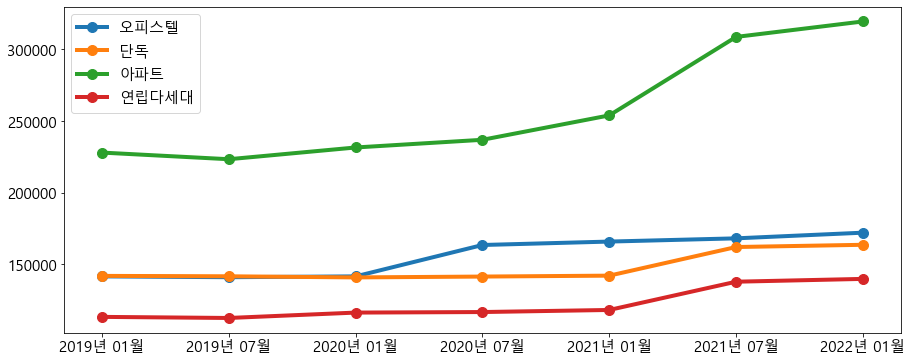

In [131]:
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (15, 6)

df.T.plot(linewidth=4, marker='o', markersize=10)